In [1]:
import sounddevice as sd

In [2]:
wave_length = 5
sample_rate = 16000
print("rec start!!")
data = sd.rec(int(wave_length * sample_rate), sample_rate, channels=1)
sd.wait()


rec start!!


In [3]:
data

array([[ 0.00091066],
       [ 0.00308262],
       [ 0.0030133 ],
       ...,
       [-0.02174131],
       [-0.02455925],
       [-0.02897485]], dtype=float32)

## 窓関数

* ハニング窓
* ハミング窓

### ハニング窓

$$
w(n) = 0.5 - 0.5\text{cos}\left(\frac{2 \pi n}{N-1}\right) \tag{2.1}
$$

where. $0 \leq n \leq N -1$　N is called "frame size", which is defined as the number of samples in the frames. n is the number of samples which is counted from the first in the frame

### ハミング窓

$$
w(n) = 0.54 - 0.46\text{cos}\left(\frac{2 \pi n}{N - 1} \right) \tag{2.2}
$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

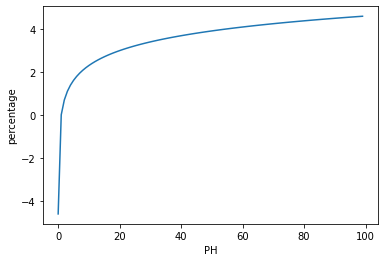

In [5]:


x = np.arange(0.01, 100)
f = np.log(x)

plt.plot(x, f)
plt.ylabel("percentage")
plt.xlabel("PH")
plt.show()


フレームごとの音声波形

$$
x'(l,n) = w(n)x(l\times L_{shift} + )
$$

短時間フーリエ変換

$$
y(l, k) = \displaystyle{\sum_{n=0}^{N-1}}x'(l, n)exp(-j \frac{2 \pi n k}{N}
$$

In [6]:
z = 1.0 + 2.0j
u = 2.0 + 3.0j

print(z)
print(u)

print(np.real(z))
print(np.imag(z))

(1+2j)
(2+3j)
1.0
2.0


In [7]:
print(np.conjugate(z))
print(np.abs(z))

(1-2j)
2.23606797749979


In [8]:
v = z + u
print(v)

(3+5j)


In [9]:
print(z - u)

(-1-1j)


In [10]:
print(z * u)

(-4+7j)


In [11]:
print(z/u)

(0.6153846153846154+0.07692307692307691j)


周波数fの波形x'(l, n, f) は、振幅$A_{l, f}$と位相$\theta_{l, f}$を使って次のように表せる。

$$
x'(l, n, f) = A_{l, f}\text{cos}\left(\frac{2\pi f n}{F_s} + \theta_{l, f}\right)
$$

$$
x'(l, n) = \displaystyle{\sum_{f=0}^{\frac{F_s}{2}}}A_{l, f}\text{cos}\left(\frac{2\pi f n}{F_s} + \theta_{l, f}\right)
$$

オイラーの公式より

$$
\text{cos}(\theta) = \frac{\text{exp}(j\theta) + \text{exp}(-j\theta)}{2}
$$

なので、

$$
x'(l, n) = \displaystyle{\sum_{f=0}^{\frac{F_s}{2}}}\frac{ A_{l, f}\text{exp}\left(j(\frac{2\pi f n}{F_s} + \theta_{l, f})\right) + A_{l, f}\text{exp}\left(-j(\frac{2\pi f n}{F_s} + \theta_{l, f})\right)}{2}
$$

In [12]:
import wave as wave
import pyroomacoustics as pa

In [13]:
pa.datasets.CMUArcticCorpus(basedir="./CMU_ARCTIC", download=True, speaker=["aew", "axb"])

In [14]:
sample_wave_file = "./CMU_ARCTIC/cmu_us_aew_arctic/wav/arctic_a0001.wav"
wav = wave.open(sample_wave_file)
data = wav.readframes(wav.getnframes())
wav.close()

In [15]:
wav.getframerate()

16000

In [16]:
import scipy.signal as sp

sample_wave_file = "./CMU_ARCTIC/cmu_us_aew_arctic/wav/arctic_a0001.wav"
wav = wave.open(sample_wave_file)
data = wav.readframes(wav.getnframes())
wav.close()

data = np.frombuffer(data, dtype=np.int16)

f, t, stft_data = sp.stft(
    data, fs=wav.getframerate(), window="hann", nperseg=512, noverlap=256
)

print("after stft, shape: ", np.shape(stft_data))
print(f"{f} [Hz]")
print(f"{t} [sec]")

after stft, shape:  (257, 244)
[   0.     31.25   62.5    93.75  125.    156.25  187.5   218.75  250.
  281.25  312.5   343.75  375.    406.25  437.5   468.75  500.    531.25
  562.5   593.75  625.    656.25  687.5   718.75  750.    781.25  812.5
  843.75  875.    906.25  937.5   968.75 1000.   1031.25 1062.5  1093.75
 1125.   1156.25 1187.5  1218.75 1250.   1281.25 1312.5  1343.75 1375.
 1406.25 1437.5  1468.75 1500.   1531.25 1562.5  1593.75 1625.   1656.25
 1687.5  1718.75 1750.   1781.25 1812.5  1843.75 1875.   1906.25 1937.5
 1968.75 2000.   2031.25 2062.5  2093.75 2125.   2156.25 2187.5  2218.75
 2250.   2281.25 2312.5  2343.75 2375.   2406.25 2437.5  2468.75 2500.
 2531.25 2562.5  2593.75 2625.   2656.25 2687.5  2718.75 2750.   2781.25
 2812.5  2843.75 2875.   2906.25 2937.5  2968.75 3000.   3031.25 3062.5
 3093.75 3125.   3156.25 3187.5  3218.75 3250.   3281.25 3312.5  3343.75
 3375.   3406.25 3437.5  3468.75 3500.   3531.25 3562.5  3593.75 3625.
 3656.25 3687.5  3718.75 3750. 

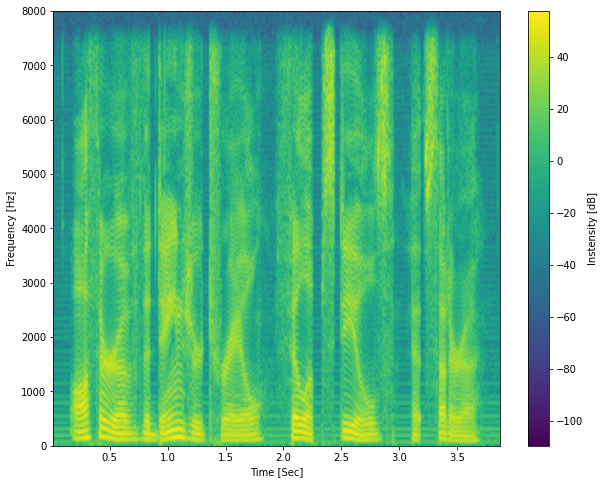

In [17]:
fig = plt.figure(figsize=(10, 8))

spectrum, freqs, t, im = plt.specgram(
    data, NFFT=512, noverlap=512/16*15, Fs=wav.getframerate()
)

fig.colorbar(im).set_label("Instensity [dB]")
plt.xlabel("Time [Sec]")
plt.ylabel("Frequency [Hz]")
plt.show()

In [18]:
t, data_post = sp.istft(stft_data, fs=wav.getframerate(), window="hann", nperseg=512, noverlap=256)
data_post = data_post.astype(np.int16)

wave_out = wave.open("./istft_post_wave.wav", "w")
wave_out.setnchannels(1)
wave_out.setsampwidth(2)
wave_out.setframerate(wav.getframerate())
wave_out.writeframes(data_post)
wave_out.close()
wav.close()

In [19]:
# 特定の周波数を消した音を再生する

stft_data[100:, :] = 0
t, data_post = sp.istft(
    stft_data, fs=wav.getframerate(), window="hann", nperseg=512, noverlap=256
)

data_post = data_post.astype(np.int16)
# sd.play(data_post, wav.getframerate())
print("play start")
#status = sd.wait()
wav.close()

play start


## 背景の雑音を消すことを考える

雑音を消すためにここでは、以下二つの方法を考える

* スペクトルサブトラクション
* ウィナーフィルタ

どちらも音声の振幅成分を変化させることで雑音を除去する手法。

※位相は変化しない。

### スペクトルサブストラクション法

入力信号の振幅成分、あるいは音量成分から雑音成分を引き算することで雑音成分を抑圧する。

$$
|s_{lk}| \approx \sqrt[p]{\text{max}(|x_{lk}|^{p} - \alpha |n_{lk}|^{p}, \epsilon)}
$$

$\alpha$ : スペクトラルサブトラクション どのくらい雑音を抑圧するかを制御する

$|n_{lk}|$ : 雑音の振幅で別途推定しておくものとする。

例）

$$
|n_{lk}| = \sqrt{\frac{1}{|Q_n|} \sum_{l\in Q_n}|x_{lk}|^{2}}
$$

In [25]:
n_speech = wav.getnframes()

n_noise_only = 40000
n_samples = n_noise_only + n_speech
wgn_signal = np.random.normal(scale=0.04, size=n_samples)
wgn_signal *= np.iinfo(np.int16).max

mix_signal = wgn_signal.astype(np.int16)
mix_signal[n_noise_only:] += speech_signal

NameError: name 'speech_signal' is not defined

In [22]:
import numpy as np

0.02636211901452944